In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [3]:
g = 9.81
l = 1
theta_0s = np.deg2rad(np.arange(0, 180, 30))
theta_dot_0s = np.zeros(12)

In [4]:
t = smp.symbols('t')
theta = smp.Function('theta')(t)

dth_dt = smp.diff(theta, t, 1)
ddth_ddt = smp.diff(theta, t, 2)

lhs = l*ddth_ddt + g*smp.sin(theta)
rhs = 0

eq = smp.Eq(lhs, rhs)                                       # Define DE

sym_sol = smp.solve(eq, ddth_ddt)[0]                        # Rearrange the DE

num_solution = smp.lambdify((t, theta), sym_sol)            # Convert to numeric the arranged DE

sym_sol

-9.81*sin(theta(t))

In [5]:
a, b = 0, 5
t = np.linspace(a, b, 151)

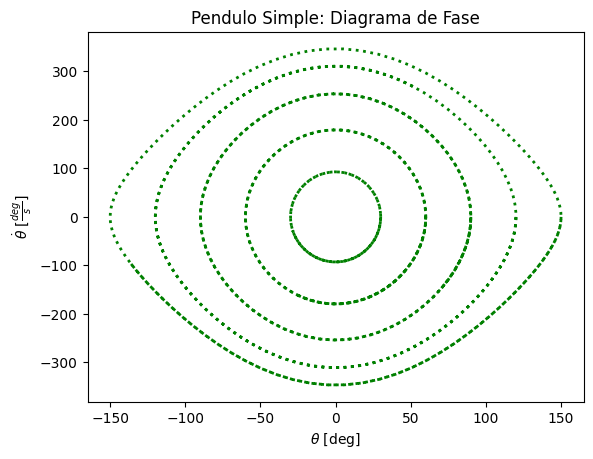

In [248]:
def sys_of_ode(t, S):
    theta, dth_dt = S

    ddth_ddt = num_solution(t, theta)

    return dth_dt, ddth_ddt


init_cond = [theta_0s, theta_dot_0s]

fig = plt.figure()

for i in range(len(init_cond[0])):

    initial_conditions = np.array([init_cond[0][i], init_cond[1][i]])

    solution = solve_ivp(
            fun = sys_of_ode,
            t_span = (a, b),
            y0 = initial_conditions,
            t_eval = t,
            rtol=1e-8
        )

    t_sol = solution.t
    theta_sol = solution.y[0]
    dth_dt_sol = solution.y[1]

    theta_sol_deg = np.rad2deg(solution.y[0])
    dth_dt_sol_deg = np.rad2deg(solution.y[1])

    plt.plot(theta_sol_deg, dth_dt_sol_deg, ':g', lw=2)
    plt.title('Pendulo Simple: Diagrama de Fase')
    plt.xlabel(r'$\theta$ [deg]')
    plt.ylabel(r'$\dot \theta$ [$\frac{deg}{s}$]')
    plt.grid()

    
    

Another method using streamplot and meshgrid

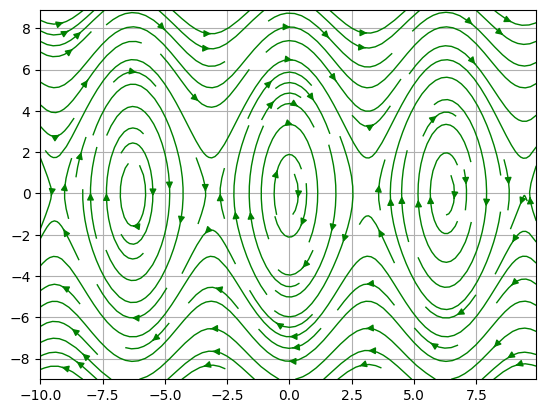

In [58]:
g, l = 9.81, 1

theta =  np.arange(-10, 10, 0.1)
theta_dot = np.arange(-9, 9, 0.1)
T_heta, T_heta_dot = np.meshgrid(theta, theta_dot)

theta_dot_dot = -g/l*np.sin(T_heta)

plt.streamplot(T_heta, T_heta_dot, T_heta_dot, theta_dot_dot, color='g', linewidth=1, density=1.2)
plt.grid()
plt.show()